In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from tabulate import tabulate

from const import MIN_TIMESTEP

Define a function to load and plot the capacity factor data.

In [3]:
def load_and_plot_cf(tech):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    cf = (pd.read_csv(f'../data/processed/CF {tech}.csv',
                     index_col=0, parse_dates=True)
          .dropna(axis=1, how='all'))

    cf.plot.box(title=f'{tech}: Capacity factor', ax=ax1);
    cf.interpolate('time').diff(1).plot.box(title=f'{tech}: {MIN_TIMESTEP} changes in CF', ax=ax2);
    return cf

## Results for onshore wind power

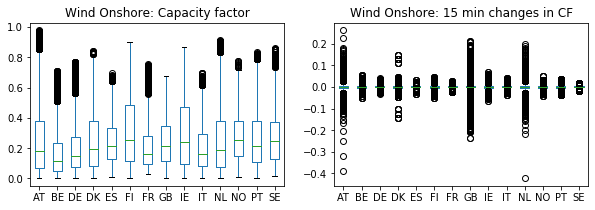

In [4]:
cf_onshore = load_and_plot_cf('Wind Onshore')

Some very high values for Austria (AT). Let’s plot the time series.

C:\Users\ERERKKA\AppData\Local\Continuum\miniconda3\envs\spyder\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


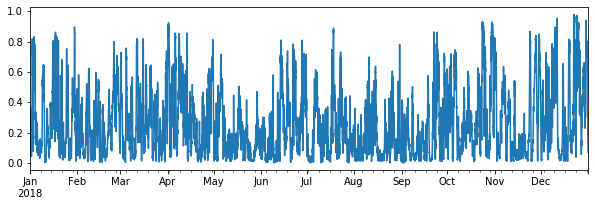

In [5]:
cf_onshore['AT'].plot(figsize=(10, 3));

Let’s look at the installed capacities. We used numbers from WindEurope in the cap. factors calculations. ENTSO-E also has that data.

In [6]:
installed_cap_windeurope = pd.read_csv('../data/intermediate/WindEurope_installed_cap.csv', 
                                       index_col=0, header=[0,1])
installed_cap_entsoe = pd.read_csv("../data/raw/ENTSO-E_TP_installed_cap.csv", 
                                   index_col=[0, 1], header=0)
wind_cap_onshore_at = pd.DataFrame({'windeurope': installed_cap_windeurope.loc['Austria', 
                                                                               'Cumulative onshore capacity'],
                                    'entso-e': installed_cap_entsoe.loc['Wind Onshore', 'AT']})
wind_cap_onshore_at

,windeurope,entso-e
Year,,
2017,2844.0,2696.0
2018,3045.0,2887.0


Let’s calculate means too.

In [7]:
wind_cap_onshore_at.mean()

windeurope    2944.5
entso-e       2791.5
dtype: float64

It seems that ENTSO-E has on average lower installed capacity which then should not lead to too *high* capacity factors.

## Results for offshore wind power

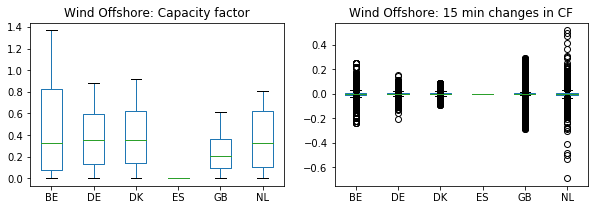

In [8]:
tech = 'Wind Offshore'
cf_offshore = load_and_plot_cf(tech)

Clearly something wrong with Belgium and Spain. Let’s plot the time series.

C:\Users\ERERKKA\AppData\Local\Continuum\miniconda3\envs\spyder\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


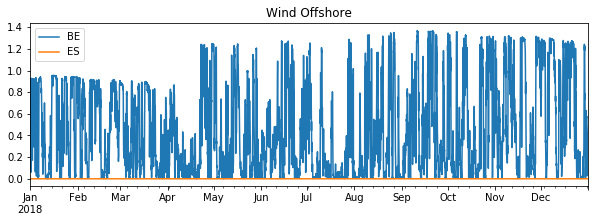

In [9]:
cf_offshore[['BE', 'ES']].dropna().plot(figsize=(10, 3), title=tech)

Clearly, Spain acctually has no data. There is a big jump in the CF values in Belgium in April/May, after which values are above 1. 

Let’s also plot the generation data for Belgium.

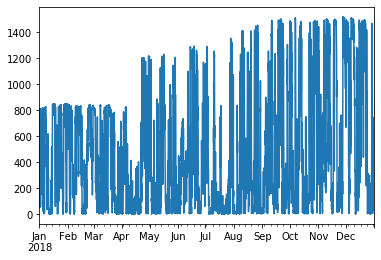

In [10]:
gen = pd.read_csv('../data/intermediate/Generation Wind Offshore.csv', index_col=0, parse_dates=True)
gen['BE'].dropna().plot();

The jump in generation is visible here too in April/May. 

Let’s compare the installed capacity between WindEurope and ENTSO-E TP.

In [11]:
wind_cap_onshore_be = pd.DataFrame({'windeurope': installed_cap_windeurope.loc['Belgium', 
                                                                               'Cumulative offshore capacity'],
                                    'entso-e': installed_cap_entsoe.loc['Wind Offshore', 'BE']})
wind_cap_onshore_be

,windeurope,entso-e
Year,,
2017,876.0,877.0
2018,1186.0,1178.0
